1st column is the acceleration data in the X axis measured by the sensor ADXL345.
2nd column is the acceleration data in the Y axis measured by the sensor ADXL345.
3rd column is the acceleration data in the Z axis measured by the sensor ADXL345.

4th column is the rotation data in the X axis measured by the sensor ITG3200.
5th column is the rotation data in the Y axis measured by the sensor ITG3200.
6th column is the rotation data in the Z axis measured by the sensor ITG3200.

7th column is the acceleration data in the X axis measured by the sensor MMA8451Q.
8th column is the acceleration data in the Y axis measured by the sensor MMA8451Q.
9th column is the acceleration data in the Z axis measured by the sensor MMA8451Q.

File name format:
**<ADL OR FALL_CODE>_<SUBJECT_ID>_<TRIAL_NO>.txt**

**Activities of Daily Living (ADL):**

<!-- <div align="center"> -->

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| D01  | Walking slowly                                                                           | 1      | 100s     |
| D02  | Walking quickly                                                                          | 1      | 100s     |
| D03  | Jogging slowly                                                                           | 1      | 100s     |
| D04  | Jogging quickly                                                                          | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly                                                   | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly                                                  | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly                          | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly                        | 5      | 12s      |
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly                           | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly                         | 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair                            | 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again                             | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again                            | 5      | 12s      |
| D14  | Being on one's back change to lateral position, wait a moment, and change to one's back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up                                        | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up                           | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car                           | 5      | 25s      |
| D18  | Stumble while walking                                                                    | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)                              | 5      | 12s      |


Falls:

| Code | Activity                                                                                 | Trials | Duration |
|:----:|------------------------------------------------------------------------------------------|:------:|:--------:|
| F01  | Fall forward while walking caused by a slip                                              | 5      | 15s      |
| F02  | Fall backward while walking caused by a slip                                             | 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip                                              | 5      | 15s      |
| F04  | Fall forward while walking caused by a trip                                              | 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip                                              | 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting                                           | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting      | 5      | 15s      |
| F08  | Fall forward when trying to get up                                                       | 5      | 15s      |
| F09  | Lateral fall when trying to get up                                                       | 5      | 15s      |
| F10  | Fall forward when trying to sit down                                                     | 5      | 15s      |
| F11  | Fall backward when trying to sit down                                                    | 5      | 15s      |
| F12  | Lateral fall when trying to sit down                                                     | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep                        | 5      | 15s      |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep                         | 5      | 15s      |
<!-- </div> -->

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import os
# import zipfile
import functions as fn
import pandas as pd

In [3]:
# Path to zip file
zip_file_path = '/Volumes/Windows SD/Master SSE/Semester 2/Fall Detection/DataSet.zip'

# zip_file_path = "DataSet/SisFall_dataset.zip"

# Base path to the dataset folder structure *inside* the zip file
# base_path = 'SisFall_dataset'
base_path = 'DataSet/SisFall_dataset'

# Create list of folder names (SA01 to SA23 and SE01 to SE15)
subject_ids = [f'SA{str(i).zfill(2)}' for i in range(1, 24)] + [f'SE{str(i).zfill(2)}' for i in range(1, 16)]


# all_data, all_labels, activity_code_list, adls, falls = fn.read_file(base_path, subject_ids)
all_data, all_labels, activity_code_list, file_name_list, adls, falls = fn.read_zip(zip_file_path, base_path, subject_ids)

print(f'number of total readings: {len(all_data)}')
print(f'number of total labels: {len(all_labels)}')
print(f'number of total activity codes: {len(activity_code_list)}')
print(f'number of total file names: {len(file_name_list)}')
print('------------------------------------------')
print(f'number of total ADL data: {len(adls)}')
print(f'number of total Fall data: {len(falls)}')
print('------------------------------------------')
# print number of unique labels and their counts
unique_labels, counts = np.unique(all_labels, return_counts=True)
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    print(f"{label}: {count}")

# create a dictionary to map activity codes to real-world activities
activity_mapping = {
    "D01": "Walking slowly",
    "D02": "Walking quickly",
    "D03": "Jogging slowly",
    "D04": "Jogging quickly",
    "D05": "Walking upstairs and downstairs slowly",
    "D06": "Walking upstairs and downstairs quickly",
    "D07": "Slowly sit in a half height chair, wait a moment, and up slowly",
    "D08": "Quickly sit in a half height chair, wait a moment, and up quickly",
    "D09": "Slowly sit in a low height chair, wait a moment, and up slowly",
    "D10": "Quickly sit in a low height chair, wait a moment, and up quickly",
    "D11": "Sitting a moment, trying to get up, and collapse into a chair ",
    "D12": "Sitting a moment, lying slowly, wait a moment, and sit again",
    "D13": "Sitting a moment, lying quickly, wait a moment, and sit again",
    "D14": "Being on one's back change to lateral position, wait a moment, and change to one's back",
    "D15": "Standing, slowly bending at knees, and getting up",
    "D16": "Standing, slowly bending without bending knees, and getting up",
    "D17": "Standing, get into a car, remain seated and get out of the car",
    "D18": "Stumble while walking",
    "D19": "Gently jump without falling (trying to reach a high object)",
    "F"  : "Fall",
    "F01": "Fall forward while walking caused by a slip",
    "F02": "Fall backward while walking caused by a slip",
    "F03": "Lateral fall while walking caused by a slip",
    "F04": "Fall forward while walking caused by a trip",
    "F05": "Fall backward while walking caused by a trip",
    "F06": "Vertical fall while walking caused by fainting",
    "F07": "Fall while walking, with use of hands in a table to dampen fall, caused by fainting",
    "F08": "Fall forward when trying to get up",
    "F09": "Lateral fall when trying to get up",
    "F10": "Fall forward when trying to sit down",
    "F11": "Fall backward when trying to sit down",
    "F12": "Lateral fall when trying to sit down",
    "F13": "Fall forward while sitting, caused by fainting or falling asleep",
    "F14": "Fall backward while sitting, caused by fainting or falling asleep",
    "F15": "Lateral fall while sitting, caused by fainting or falling asleep",
}

d01_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D01']
d01_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D01']
d02_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D02']
d02_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D02']
d03_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D03']
d03_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D03']
d04_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D04']
d04_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D04']
d05_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D05']
d05_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D05']
d06_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D06']
d06_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D06']
d07_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D07']
d07_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D07']
d08_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D08']
d08_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D08']
d09_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D09']
d09_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D09']
d10_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D10']
d10_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D10']
d11_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D11']
d11_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D11']
d12_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D12']
d12_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D12']
d13_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D13']
d13_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D13']
d14_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D14']
d14_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D14']
d15_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D15']
d15_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D15']
d16_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D16']
d16_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D16']
d17_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D17']
d17_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D17']
d18_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D18']
d18_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D18']
d19_data = [data for i, data in enumerate(all_data) if activity_code_list[i] == 'D19']
d19_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i] == 'D19']
fall_data = [data for i, data in enumerate(all_data) if activity_code_list[i].startswith('F')]
fall_file_names = [file_name_list[i] for i in range(len(file_name_list)) if activity_code_list[i].startswith('F')]



Progress: 4505/4505 files processed
Total files processed: 4505 ✅
Total ADL labels: 2707 ✅
Total Fall labels: 1798 ✅
number of total readings: 4505
number of total labels: 4505
number of total activity codes: 4505
number of total file names: 4505
------------------------------------------
number of total ADL data: 2707
number of total Fall data: 1798
------------------------------------------
Unique labels and their counts:
ADL: 2707
Fall: 1798


In [4]:

# print("--------------------------------------")
print("start processing signals")

print("---------------- Fall Data ----------------")
new_fall = fn.keep_from_peak(fall_data, 400)
print("--------------------------------------")
print("-------- D01, D02, D03, D04 --------")
new_01, d01_file_names, d01_activity_code_list = fn.split_and_add(d01_data, 800, d01_file_names)
new_02, d02_file_names, d02_activity_code_list = fn.split_and_add(d02_data, 800, d02_file_names)
new_03, d03_file_names, d03_activity_code_list = fn.split_and_add(d03_data, 800, d03_file_names)
new_04, d04_file_names, d04_activity_code_list = fn.split_and_add(d04_data, 800, d04_file_names)
print("---------------- D05 ----------------")
new_d05_data = fn.idle_remover(d05_data, 200, 30, mode='gyro')
new_05_1, new_05_2 = fn.split_and_center(new_d05_data, 800)
print("---------------- D06 ----------------")
new_d06_data = fn.idle_remover(d06_data, 150, 30, mode='acc')
new_06_1, new_06_2 = fn.split_and_center(new_d06_data, 800)
print("---------------- D07 ----------------")
# for i in range(len(d07_data)):
#     d07_data[i] = d07_data[i][:, 200:]
new_d07_data_1, new_d07_data_2 = fn.extract_from_high_amp_segments(d07_data, 100, 100, 0.3, 700, 200, 800, "gyro")
print("---------------- D08 ----------------")
new_d08_data_1, new_d08_data_2 = fn.extract_from_high_amp_segments(d08_data, 100, 100, 0.14, 500, 100, 500, "gyro")
print("---------------- D09 ----------------")
new_d09_data_1, new_d09_data_2 = fn.extract_from_high_amp_segments(d09_data, 100, 100, 0.1, 700, 100, 700, "gyro")
print("---------------- D10 ----------------")
new_d10_data_1, new_d10_data_2 = fn.extract_from_high_amp_segments(d10_data, 100, 100, 0.1, 500, 100, 500, "gyro")
print("---------------- D11 ----------------")
new_d11_data = fn.keep_from_peak(d11_data, 400)
print("---------------- D12 ----------------")
new_d12_data_1, new_d12_data_2 = fn.extract_from_high_amp_segments(d12_data, 100, 100, 0.2, 800, 200, 800, "gyro")
print("---------------- D13 ----------------")
new_d13_data_1, new_d13_data_2 = fn.extract_from_high_amp_segments(d13_data, 100, 100, 0.2, 500, 50, 500, "gyro")
print("---------------- D14 ----------------")
new_d14_data_1, new_d14_data_2 = fn.extract_from_high_amp_segments(d14_data, 100, 100, 0.15, 600, 100, 600, "gyro")
print("---------------- D15 ----------------")
new_d15_data_1, new_d15_data_2 = fn.extract_from_high_amp_segments(d15_data, 250, 250, 0.2, 700, 200, 800, "gyro")
print("---------------- D16 ----------------")
new_d16_data_1, new_d16_data_2 = fn.extract_from_high_amp_segments(d16_data, 100, 100, 0.15, 700, 200, 800, "gyro")
print("---------------- D17 ----------------")
for i in range(len(d17_data)):
    d17_data[i] = d17_data[i][:, 300:]
new_d17_data_1, new_d17_data_2 = fn.extract_from_high_amp_segments(d17_data, 300, 300, 0.3, 1000, 200, 1000, "gyro")
print("---------------- D18 ----------------")
new_d18_data = fn.keep_from_peak(d18_data, 400)
print("---------------- D19 ----------------")
new_d19_data_1, new_d19_data_2 = fn.extract_from_high_amp_segments(d19_data, 100, 100, 0.2, 400, 150, 500, "acc")

new_07_1 = fn.length_fix(new_d07_data_1, 800)
new_07_2 = fn.length_fix(new_d07_data_2, 800)
new_08_1 = fn.length_fix(new_d08_data_1, 800)
new_08_2 = fn.length_fix(new_d08_data_2, 800)
new_09_1 = fn.length_fix(new_d09_data_1, 800)
new_09_2 = fn.length_fix(new_d09_data_2, 800)
new_10_1 = fn.length_fix(new_d10_data_1, 800)
new_10_2 = fn.length_fix(new_d10_data_2, 800)
new_11_1 = fn.length_fix(new_d11_data, 800)
new_12_1 = fn.length_fix(new_d12_data_1, 800)
new_12_2 = fn.length_fix(new_d12_data_2, 800)
new_13_1 = fn.length_fix(new_d13_data_1, 800)
new_13_2 = fn.length_fix(new_d13_data_2, 800)
new_14_1 = fn.length_fix(new_d14_data_1, 800)
new_14_2 = fn.length_fix(new_d14_data_2, 800)
new_15_1 = fn.length_fix(new_d15_data_1, 800)
new_15_2 = fn.length_fix(new_d15_data_2, 800)
new_16_1 = fn.length_fix(new_d16_data_1, 800)
new_16_2 = fn.length_fix(new_d16_data_2, 800)
new_18_1 = fn.length_fix(new_d18_data, 800)
new_19_1 = fn.length_fix(new_d19_data_1, 800)
new_19_2 = fn.length_fix(new_d19_data_2, 800)


start processing signals
---------------- Fall Data ----------------
1798 files processed 
Min length: 800 
Max length: 800
--------------------------------------
-------- D01, D02, D03, D04 --------
number of new D01 data: 932 with shape: (932, 6, 800), file_names :932, activities: 932 
number of new D02 data: 964 with shape: (964, 6, 800), file_names :964, activities: 964 
number of new D03 data: 965 with shape: (965, 6, 800), file_names :965, activities: 965 
number of new D04 data: 915 with shape: (915, 6, 800), file_names :915, activities: 915 
---------------- D05 ----------------
190 files processed, Min length: 2800, Max length: 5000
190 files processed, Min length: 800, Max length: 800
190 files processed, Min length: 800, Max length: 800
---------------- D06 ----------------
118 files processed, Min length: 1350, Max length: 2550
118 files processed, Min length: 800, Max length: 800
118 files processed, Min length: 800, Max length: 800
---------------- D07 ----------------
Nu

In [5]:
# earpiece_data = pd.read_csv('earpiece/walking_7.csv')
# e_data = earpiece_data[['X', 'Y', 'Z']].T
# e_data = e_data.values
# e_data

In [6]:
# test_data = new_01[10]

# fig = plt.figure(figsize=(10, 10))

# plt.subplot(2, 1, 1)
# plt.plot(e_data[0][1000:1800], label='Earpiece X')
# plt.plot(e_data[1][1000:1800], label='Earpiece Y')
# plt.plot(e_data[2][1000:1800], label='Earpiece Z')
# plt.title('Earpiece Data')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid()

# plt.subplot(2, 1, 2)
# plt.plot(test_data[0], label='Sisfall X')
# plt.plot(test_data[1], label='Sisfall Y')
# plt.plot(test_data[2], label='Sisfall Z')
# plt.title('Sisfall Data (D01)')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid()
# plt.show()

In [7]:
# swap accelerometer and gyroscope X (channel 0 and 3) with Y (channel 1 and 4)
def swap_x_with_y(group):
    for i in range(len(group)):
        group[i][[0, 1], :] = group[i][[1, 0], :]  # swap Acc X with Acc Y
        group[i][[3, 4], :] = group[i][[4, 3], :]  # swap Gyro X with Gyro Y

new_01 = list(new_01)
new_02 = list(new_02)
new_03 = list(new_03)
new_04 = list(new_04)

# List of all processed signal groups to apply the replacement
all_segments = [
    new_01, new_02, new_03, new_04,
    new_05_1, new_05_2, new_06_1, new_06_2,
    new_07_1, new_07_2, new_08_1, new_08_2,
    new_09_1, new_09_2, new_10_1, new_10_2,
    new_11_1,
    new_12_1, new_12_2, new_13_1, new_13_2,
    new_14_1, new_14_2, new_15_1, new_15_2,
    new_16_1, new_16_2, new_18_1, new_19_1, new_19_2,
    new_fall  # Don't forget the fall data
]

# change to list of numpy arrays
# all_segments = [np.array(group) for group in all_segments]

# Apply the transformation to all
for group in all_segments:
    swap_x_with_y(group)


# Convert from int to float and divide first 3 rows by 256 to convert to g
for group in all_segments:
    for i in range(len(group)):
        group[i] = group[i].astype(float)             # Ensure float dtype
        group[i][0:3, :] = group[i][0:3, :] / 256.0    # Convert accel to g

print("Swapped X axis (acc/gyro) values with Y axis values in all segments.")

Swapped X axis (acc/gyro) values with Y axis values in all segments.


In [8]:
# test_data = new_01[10]

# fig = plt.figure(figsize=(10, 10))

# plt.subplot(2, 1, 1)
# plt.plot(e_data[0][1000:1800], label='Earpiece X')
# plt.plot(e_data[1][1000:1800], label='Earpiece Y')
# plt.plot(e_data[2][1000:1800], label='Earpiece Z')
# plt.title('Earpiece Data')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid()

# plt.subplot(2, 1, 2)
# plt.plot(test_data[0], label='Sisfall X')
# plt.plot(test_data[1], label='Sisfall Y')
# plt.plot(test_data[2], label='Sisfall Z')
# plt.title('Sisfall Data (D01)')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.grid()
# plt.show()

In [9]:
walking_signals = list(new_01) + list(new_02)
jogging_signals = list(new_03) + list(new_04)
stairs_signals = list(new_05_1) + list(new_05_2) + list(new_06_1) + list(new_06_2)
sitting_signals = list(new_07_1) + list(new_08_1) + list(new_09_1) + list(new_10_1)
fall_signals = list(new_fall)

# only keep the first 3 channels (accel) 
walking_signals = [signal[:3, :] for signal in walking_signals]
jogging_signals = [signal[:3, :] for signal in jogging_signals]
stairs_signals = [signal[:3, :] for signal in stairs_signals]
sitting_signals = [signal[:3, :] for signal in sitting_signals]
fall_signals = [signal[:3, :] for signal in fall_signals]

In [10]:
# Create lists for ADLs and binary classification
# ADLs: Walking, Jogging, Stairs, Sitting
# Binary: ADLs (0), Fall (1)
# Combined: Walking (0), Jogging (1), Stairs (2), Sitting (3), Fall (4)

X_list_adls = walking_signals + jogging_signals + stairs_signals + sitting_signals
y_list_adls = (
    [0] * len(walking_signals) +
    [1] * len(jogging_signals) +
    [2] * len(stairs_signals) +
    [3] * len(sitting_signals)
)

X_list_binary = walking_signals + jogging_signals + stairs_signals + sitting_signals + fall_signals
y_list_binary = (
    [0] * len(walking_signals) +
    [0] * len(jogging_signals) +
    [0] * len(stairs_signals) +
    [0] * len(sitting_signals) +
    [1] * len(fall_signals)
)

# X_list = walking_signals + jogging_signals + sitting_signals + fall_signals
X_list_combined = walking_signals + jogging_signals + stairs_signals + sitting_signals + fall_signals
y_list_combined = (
    [0] * len(walking_signals) +
    [1] * len(jogging_signals) +
    [2] * len(stairs_signals) +
    [3] * len(sitting_signals) +
    [4] * len(fall_signals)
)

class_names_combined = ["Walking", "Jogging", "Stairs", "Sitting", "Fall"]
class_names_adls = ["Walking", "Jogging", "Stairs", "Sitting"]
class_names_binary = ["ADL", "Fall"]
numeric_labels_combined = [0, 1, 2, 3, 4]  # 
numeric_labels_adls = [0, 1, 2, 3]  # 
numeric_labels_binary = [0, 1]  # 



X_combined = np.array(X_list_combined)  # shape: (samples, 3, 800)
y_combined = np.array(y_list_combined)
X_adls = np.array(X_list_adls)  # shape: (samples, 3, 800)
y_adls = np.array(y_list_adls)
X_binary = np.array(X_list_binary)  # shape: (samples, 3, 800)
y_binary = np.array(y_list_binary)



In [ ]:
# import numpy as np
from scipy.stats import skew, kurtosis, entropy
from scipy.signal import welch

def extract_features(signal, fs=200):
    ax, ay, az = signal[1], signal[0], signal[2]
    N = signal.shape[1]
    t = np.arange(N) / fs  # time vector

    mag = np.sqrt(ax**2 + ay**2 + az**2)

    # Time-domain features
    C1 = np.sqrt(np.mean(mag**2))  # RMS magnitude
    C2 = np.sqrt(np.mean(ax**2 + az**2))  # RMS horizontal (X,Z)
    peak_to_peak = np.max(mag) - np.min(mag)
    C3 = np.sqrt(peak_to_peak)
    C4 = np.mean(np.arctan2(np.sqrt(ax**2 + az**2), -ay))
    C5 = np.std(np.arctan(np.sqrt(np.mean(ax**2 + az**2)) / np.mean(ay)))
    C6 = np.mean(ax[:-1]) * np.mean(ax[1:]) if N > 1 else 0
    jerk = np.diff(ax) / np.diff(t) if N > 1 else np.array([0])
    C7 = np.mean(np.abs(jerk)) if len(jerk) > 0 else 0
    C8 = np.sqrt(np.std(ax)**2 + np.std(az)**2)
    C9 = np.sqrt(np.std(ax)**2 + np.std(ay)**2 + np.std(az)**2)
    C10 = (np.sum(np.abs(ax)) + np.sum(np.abs(ay)) + np.sum(np.abs(az))) / N
    C11 = (np.sum(np.abs(ax)) + np.sum(np.abs(az))) / N
    C12 = np.sum(mag)
    C13 = np.sum(np.sqrt(ax**2 + az**2))
    vel_x = np.cumsum(ax) / fs
    vel_z = np.cumsum(az) / fs
    C14 = np.sqrt((np.sum(vel_x))**2 + (np.sum(vel_z))**2) / N
    C15, C16, C17 = np.mean(ax), np.mean(ay), np.mean(az)
    C18, C19, C20 = np.std(ax), np.std(ay), np.std(az)
    C21, C22, C23 = skew(ax), skew(ay), skew(az)
    C24, C25, C26 = kurtosis(ax), kurtosis(ay), kurtosis(az)
    C27 = np.sum(np.diff(np.sign(mag - np.mean(mag))) != 0)
    
    # Frequency-domain features
    f, Pxx = welch(mag, fs=fs, nperseg=min(256, N))
    Pxx_norm = Pxx / np.sum(Pxx) if np.sum(Pxx) > 0 else Pxx
    C28 = entropy(Pxx_norm)
    C29 = f[np.argmax(Pxx)] if len(f) > 0 else 0
    C30 = np.sum(Pxx[(f >= 0) & (f <= 5)]) if len(f) > 0 else 0

    # Correlation features
    C31 = np.corrcoef(ax, ay)[0, 1] if N > 1 else 0
    C32 = np.corrcoef(ay, az)[0, 1] if N > 1 else 0
    C33 = np.corrcoef(ax, az)[0, 1] if N > 1 else 0

    # return [
    #     C1, C2, C3, C4, C6, C7, C8, C9,
    #     C13, C16, C18, C19, C20,
    #     C22, C24, C25, C26, C28, C29, C30,
    #     C32
    # ]

    return [
        C1, C2, C3, C4, C5, C6, C7, C8, C9, C10,
        C11, C12, C13, C14, C15, C16, C17, C18, C19, C20,
        C21, C22, C23, C24, C25, C26, C27, C28, C29, C30,
        C31, C32, C33
    ]


In [12]:
feature_matrix_combined = np.array([extract_features(s) for s in X_combined])
label_vector = np.array(y_combined)
feature_matrix_adls = np.array([extract_features(s) for s in X_adls])
label_vector_adls = np.array(y_adls)
feature_matrix_binary = np.array([extract_features(s) for s in X_binary])
label_vector_binary = np.array(y_binary)

print("Feature matrix shape:", feature_matrix_combined.shape)

Feature matrix shape: (6940, 33)


In [13]:
# walk_files = ['walking_1.csv', 'walking_4.csv', 'walking_5.csv', 'walking_6.csv', 'walking_7.csv']
# # walk_files = ['walking_1.csv', 'walking_2.csv', 'walking_3.csv', 'walking_4.csv', 'walking_5.csv', 'walking_6.csv', 'walking_7.csv']
# walk_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in walk_files]

# # jogging_files = ['jogging_1.csv', 'jogging_2.csv', 'jogging_3.csv']
# jogging_files = ['jogging_3.csv']
# jogging_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in jogging_files]

# # stairs_files = ['stairs_1.csv', 'stairs_2.csv', 'stairs_3.csv', 'stairs_4.csv', 'stairs_5.csv', 'stairs_6.csv', 'stairs_7.csv', 'stairs_8.csv']
# stairs_files = ['stairs_1.csv', 'stairs_2.csv', 'stairs_3.csv', 'stairs_4.csv', 'stairs_6.csv', 'stairs_7.csv', 'stairs_8.csv']
# stairs_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in stairs_files]



# Load walking data
earpiece_walk_data = pd.read_csv('earpiece/walking_7.csv')
e_data_walk = earpiece_walk_data[['X', 'Y', 'Z']].T.values

# Load jogging and stairs data
earpiece_jogging_data = pd.read_csv('earpiece/jogging_3.csv')
e_data_jogging = earpiece_jogging_data[['X', 'Y', 'Z']].T.values

# Load stairs data
earpiece_stairs_data = pd.read_csv('earpiece/stairs_7.csv')
e_data_stairs = earpiece_stairs_data[['X', 'Y', 'Z']].T.values

# Load fall data
fall_files = ['earpiece/fall_1.csv', 'earpiece/fall_2.csv', 'earpiece/fall_3.csv', 'earpiece/fall_4.csv']
fall_data_list = [pd.read_csv(f)[['X', 'Y', 'Z']].T.values for f in fall_files]

fall_data_list = fn.keep_from_peak(fall_data_list, 400)

# Segment data into chunks of 800 samples
list_of_walk_segments = [
    e_data_walk[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_walk.shape[1] // 800)
]

list_of_jogging_segments = [
    e_data_jogging[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_jogging.shape[1] // 800)
]

list_of_stairs_segments = [
    e_data_stairs[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_stairs.shape[1] // 800)
]

walk_data_array = np.stack(list_of_walk_segments)
walk_features = np.array([extract_features(seg.reshape(3, 800)) for seg in walk_data_array])
walk_labels = [0] * len(walk_features)  # 0 = walking

jogging_data_array = np.stack(list_of_jogging_segments)
jogging_features = np.array([extract_features(seg.reshape(3, 800)) for seg in jogging_data_array])
jogging_labels = [1] * len(jogging_features)  # 1 = jogging

stairs_data_array = np.stack(list_of_stairs_segments)
stairs_features = np.array([extract_features(seg.reshape(3, 800)) for seg in stairs_data_array])
stairs_labels = [2] * len(stairs_features)  # 2 = stairs

fall_features = np.array([extract_features(seg) for seg in fall_data_list])
fall_labels = [4] * len(fall_features)  # 4 = fall

4 files processed 
Min length: 800 
Max length: 800


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay


X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    feature_matrix_combined, label_vector, test_size=0.2, random_state=42, stratify=label_vector
)

X_train_adls, X_test_adls, y_train_adls, y_test_adls = train_test_split(
    feature_matrix_adls, label_vector_adls, test_size=0.2, random_state=42, stratify=label_vector_adls
)

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    feature_matrix_binary, label_vector_binary, test_size=0.2, random_state=42, stratify=label_vector_binary
)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "SVM (RBF Kernel)": SVC(kernel='poly', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000, random_state=42)
}


class_names_combined = ["Walking", "Jogging", "Stairs", "Sitting", "Fall"]
class_names_adls = ["Walking", "Jogging", "Stairs", "Sitting"]
class_names_binary = ["ADL", "Fall"]
numeric_labels_combined = [0, 1, 2, 3, 4]  # Walking, Jogging, Stairs, Sitting, Fall
numeric_labels_adls = [0, 1, 2, 3]  # Walking, Jogging, Stairs, Sitting
numeric_labels_binary = [0, 1]  # ADL, Fall

Combined Classification Results:
33 features extracted from each signal.

--------------------------------------------------


Random Forest Cross-Validation (Combined):
CV Accuracy: 0.8073 ± 0.0643
Random Forest Test Accuracy: 0.9935

Decision Tree Cross-Validation (Combined):
CV Accuracy: 0.7588 ± 0.0571
Decision Tree Test Accuracy: 0.9906

Extra Trees Cross-Validation (Combined):
CV Accuracy: 0.7682 ± 0.0739
Extra Trees Test Accuracy: 0.9993

LDA Cross-Validation (Combined):
CV Accuracy: 0.8108 ± 0.0614
LDA Test Accuracy: 0.8739

KNN (k=3) Cross-Validation (Combined):
CV Accuracy: 0.5575 ± 0.0236
KNN (k=3) Test Accuracy: 0.9481

SVM (RBF Kernel) Cross-Validation (Combined):
CV Accuracy: 0.6991 ± 0.0708
SVM (RBF Kernel) Test Accuracy: 0.7125

Logistic Regression Cross-Validation (Combined):


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

CV Accuracy: 0.8565 ± 0.0490


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9265

--------------------------------------------------

Random Forest Accuracy (Combined): 0.9935


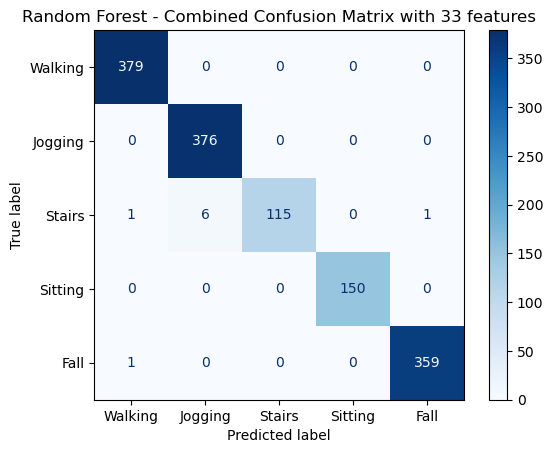

Decision Tree Accuracy (Combined): 0.9906


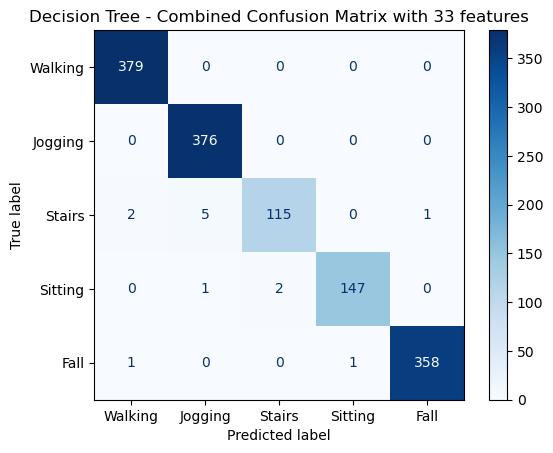

Extra Trees Accuracy (Combined): 0.9993


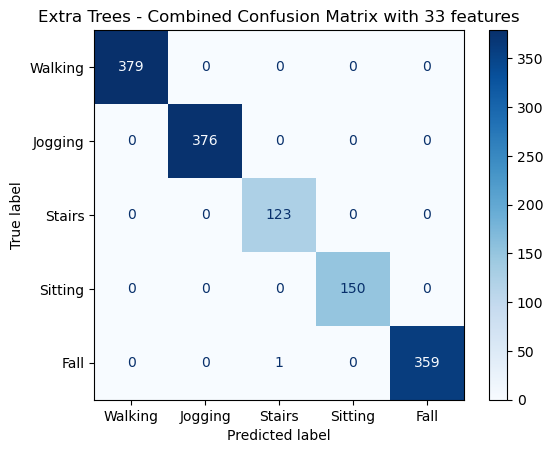

LDA Accuracy (Combined): 0.8739


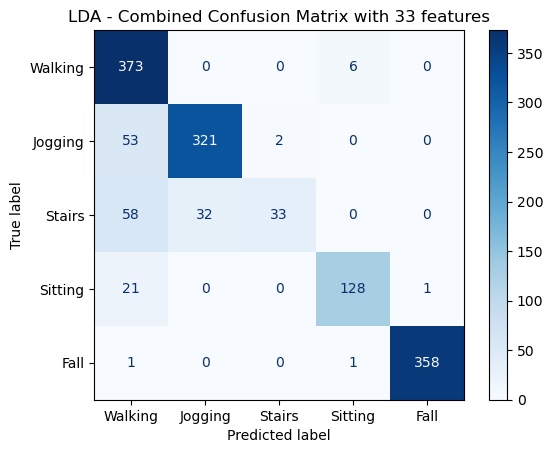

KNN (k=3) Accuracy (Combined): 0.9481


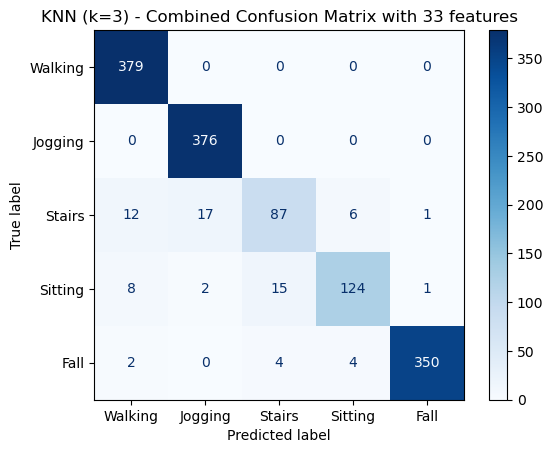

SVM (RBF Kernel) Accuracy (Combined): 0.7125


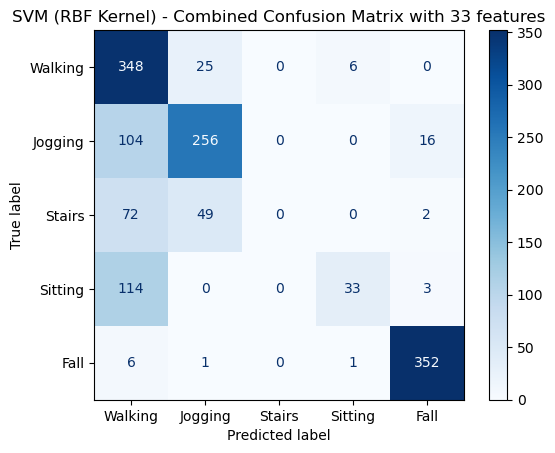

Logistic Regression Accuracy (Combined): 0.9265


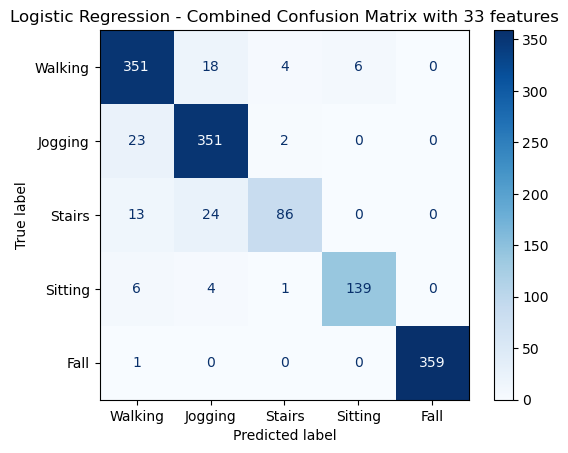

In [15]:
print("Combined Classification Results:")
print(f"{feature_matrix_combined.shape[1]} features extracted from each signal.")

print("\n" + "-"*50 + "\n")

for name, model in models.items():
    print(f"\n{name} Cross-Validation (Combined):")
    cv_scores = cross_val_score(model, feature_matrix_combined, label_vector, cv=5);
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    model.fit(X_train_combined, y_train_combined);
    y_pred = model.predict(X_test_combined);
    acc = accuracy_score(y_test_combined, y_pred);
    print(f"{name} Test Accuracy: {acc:.4f}")
    
print("\n" + "-"*50 + "\n")

for name, model in models.items():
    y_pred = model.predict(X_test_combined)
    acc = accuracy_score(y_test_combined, y_pred)
    print(f"{name} Accuracy (Combined): {acc:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(y_test_combined, y_pred, display_labels=class_names_combined, cmap="Blues")
    plt.title(f"{name} - Combined Confusion Matrix with {X_test_combined.shape[1]} features")
    plt.show()

Random Forest Accuracy: 0.3924


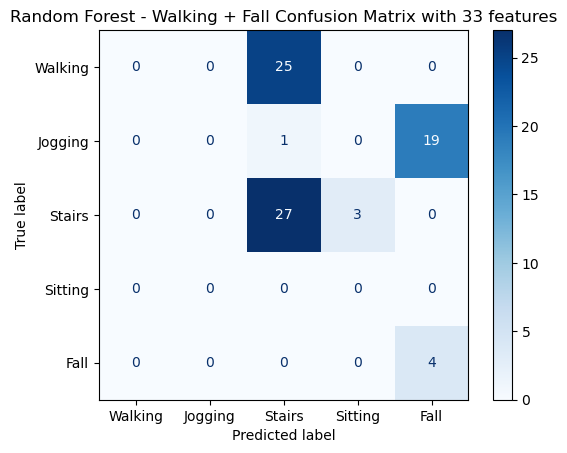

Decision Tree Accuracy: 0.4304


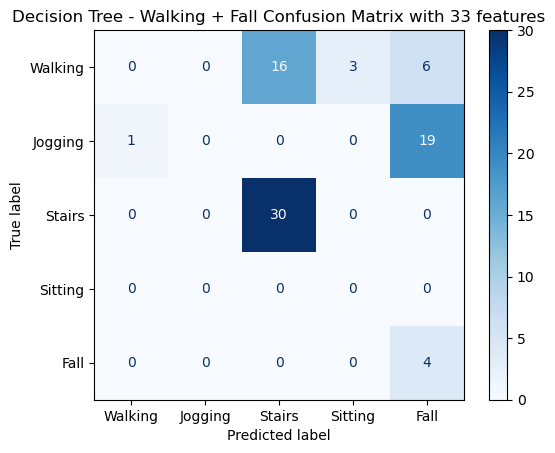

Extra Trees Accuracy: 0.3671


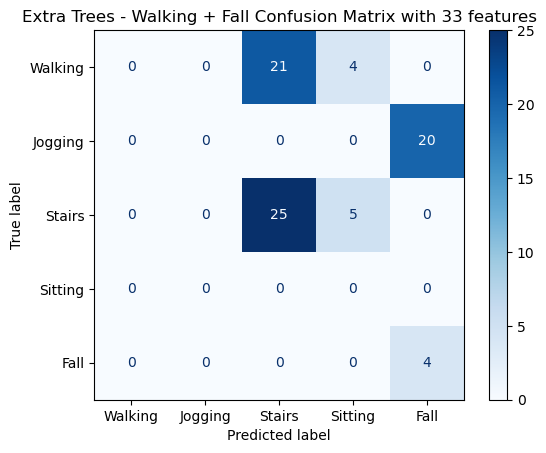

LDA Accuracy: 0.4937


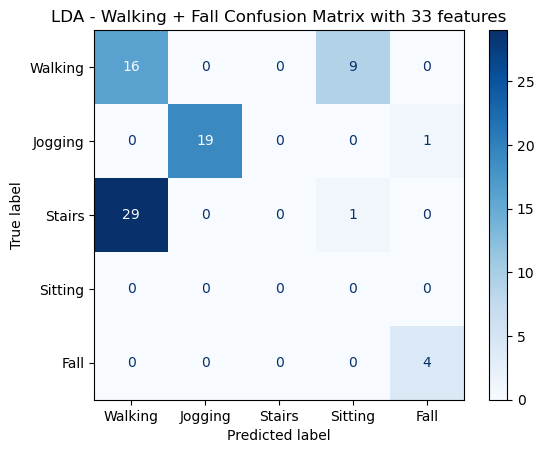

KNN (k=3) Accuracy: 0.3671


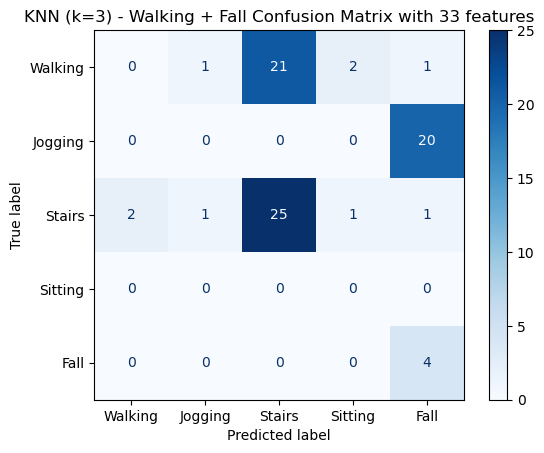

SVM (RBF Kernel) Accuracy: 0.3418


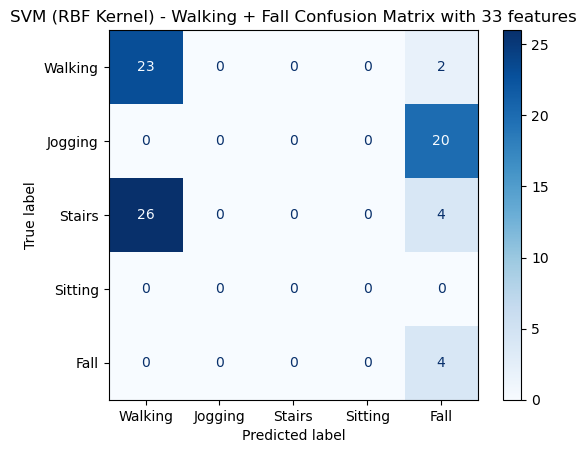

Logistic Regression Accuracy: 0.2278


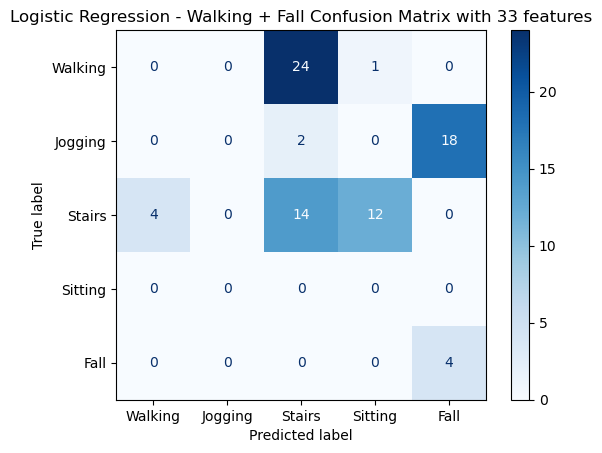

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Combine walking and fall features and labels
X_e_combined = np.vstack([walk_features, jogging_features, stairs_features, fall_features])
y_e_combined = np.array(walk_labels + jogging_labels + stairs_labels + fall_labels)

# X_combined = np.vstack([walk_features, jogging_features, stairs_features])
# y_combined = np.array(walk_labels + jogging_labels + stairs_labels)

# Evaluate models on combined data
for name, model in models.items():
    predictions = model.predict(X_e_combined)
    acc = accuracy_score(y_e_combined, predictions)
    print(f"{name} Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_e_combined, predictions, labels=[0, 1, 2, 3, 4])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_combined)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Walking + Fall Confusion Matrix with {X_e_combined.shape[1]} features")
    plt.show()

ADLs Classification Results:
33 features extracted from each signal.

--------------------------------------------------


Random Forest Cross-Validation (ADLs):
CV Accuracy: 0.7805 ± 0.1078
Random Forest Test Accuracy: 0.9932

Decision Tree Cross-Validation (ADLs):
CV Accuracy: 0.6622 ± 0.0555
Decision Tree Test Accuracy: 0.9883

Extra Trees Cross-Validation (ADLs):
CV Accuracy: 0.7118 ± 0.1011
Extra Trees Test Accuracy: 1.0000

LDA Cross-Validation (ADLs):
CV Accuracy: 0.8170 ± 0.0615
LDA Test Accuracy: 0.8989

KNN (k=3) Cross-Validation (ADLs):
CV Accuracy: 0.4222 ± 0.0361
KNN (k=3) Test Accuracy: 0.9397

SVM (RBF Kernel) Cross-Validation (ADLs):
CV Accuracy: 0.6165 ± 0.0915
SVM (RBF Kernel) Test Accuracy: 0.6278

Logistic Regression Cross-Validation (ADLs):


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

CV Accuracy: 0.8343 ± 0.0601


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Test Accuracy: 0.9038

--------------------------------------------------

Random Forest Accuracy (ADLs): 0.9932


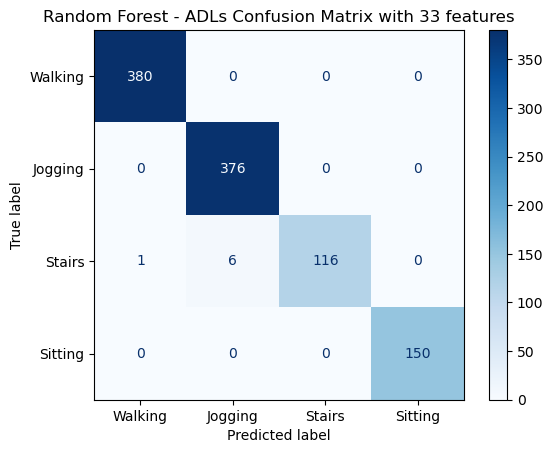

Decision Tree Accuracy (ADLs): 0.9883


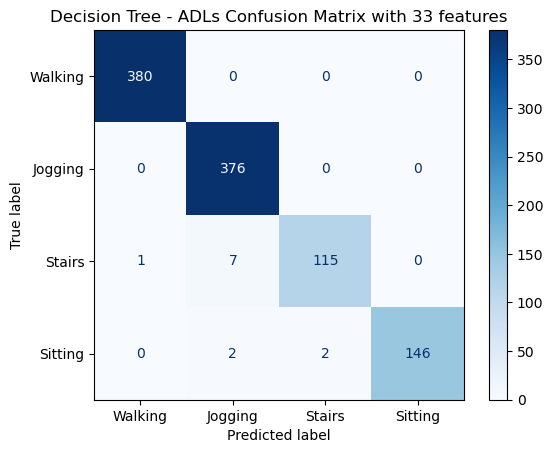

Extra Trees Accuracy (ADLs): 1.0000


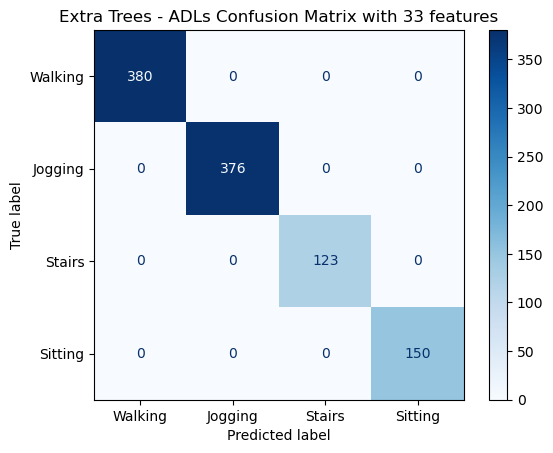

LDA Accuracy (ADLs): 0.8989


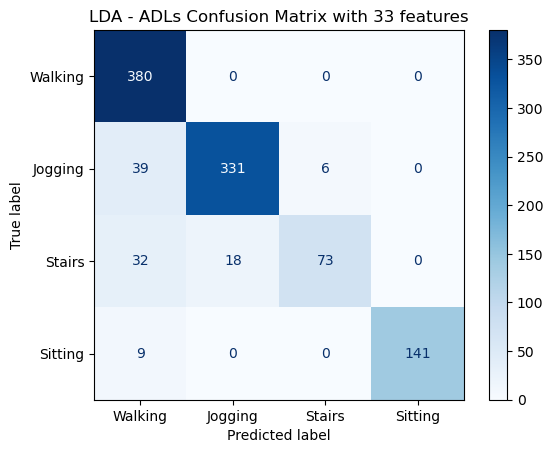

KNN (k=3) Accuracy (ADLs): 0.9397


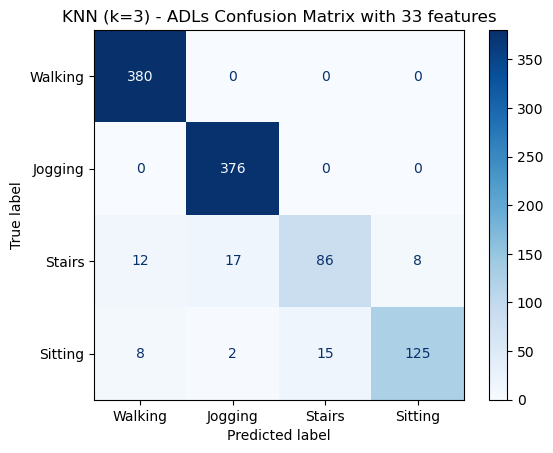

SVM (RBF Kernel) Accuracy (ADLs): 0.6278


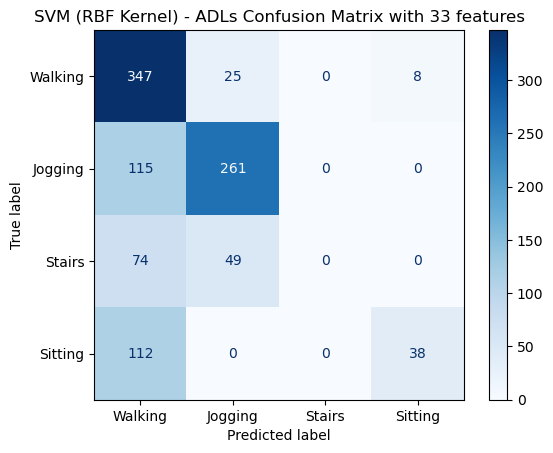

Logistic Regression Accuracy (ADLs): 0.9038


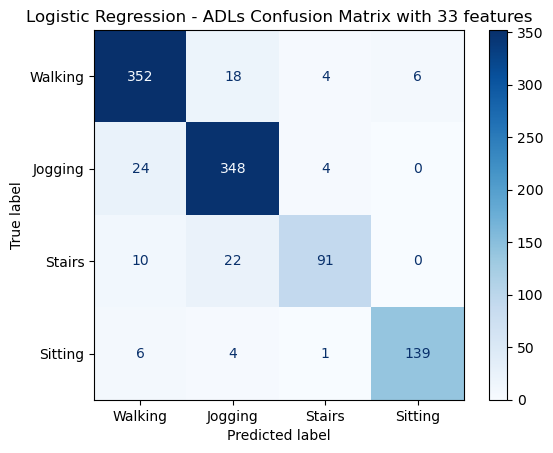

In [17]:
print("ADLs Classification Results:")
print(f"{feature_matrix_adls.shape[1]} features extracted from each signal.")

print("\n" + "-"*50 + "\n")

for name, model in models.items():
    print(f"\n{name} Cross-Validation (ADLs):")
    cv_scores = cross_val_score(model, feature_matrix_adls, label_vector_adls, cv=5);
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    model.fit(X_train_adls, y_train_adls);
    y_pred = model.predict(X_test_adls);
    acc = accuracy_score(y_test_adls, y_pred);
    print(f"{name} Test Accuracy: {acc:.4f}")

print("\n" + "-"*50 + "\n")

for name, model in models.items():
    y_pred = model.predict(X_test_adls)
    acc = accuracy_score(y_test_adls, y_pred)
    print(f"{name} Accuracy (ADLs): {acc:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(y_test_adls, y_pred, display_labels=class_names_adls, cmap="Blues")
    plt.title(f"{name} - ADLs Confusion Matrix with {X_test_adls.shape[1]} features")
    plt.show()


Random Forest Accuracy: 0.4000


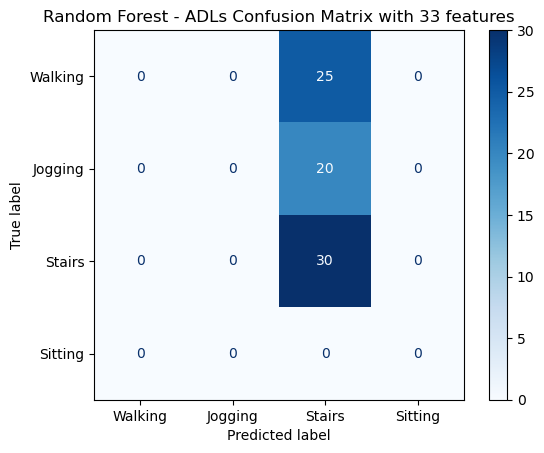

Decision Tree Accuracy: 0.4000


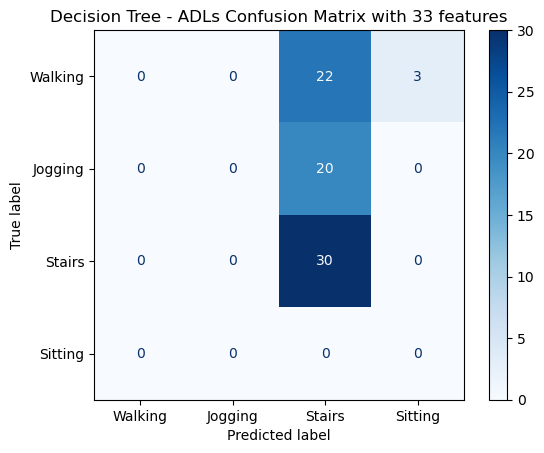

Extra Trees Accuracy: 0.2667


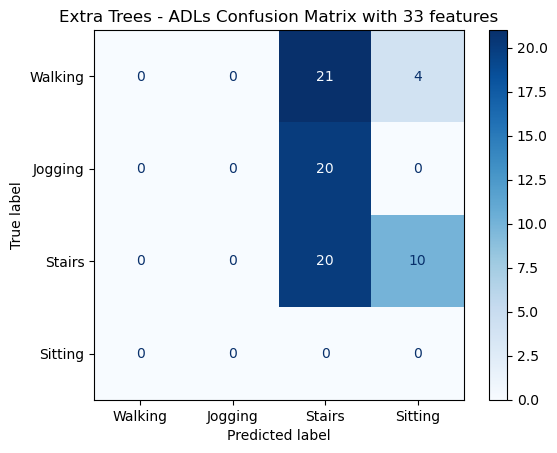

LDA Accuracy: 0.2933


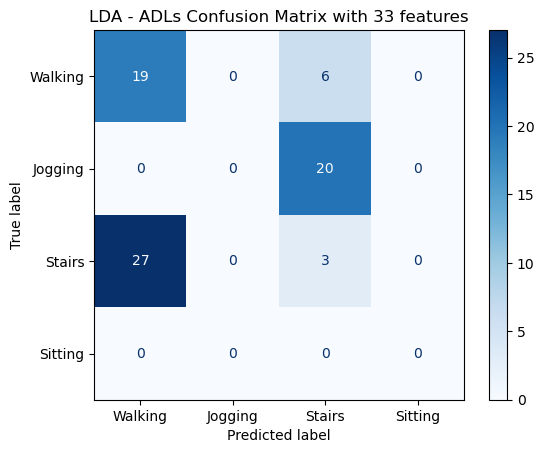

KNN (k=3) Accuracy: 0.4133


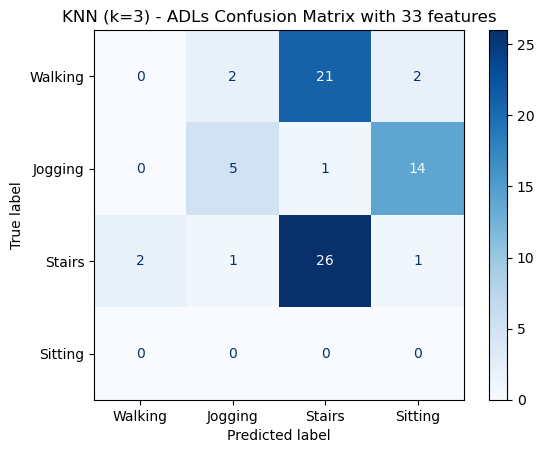

SVM (RBF Kernel) Accuracy: 0.5867


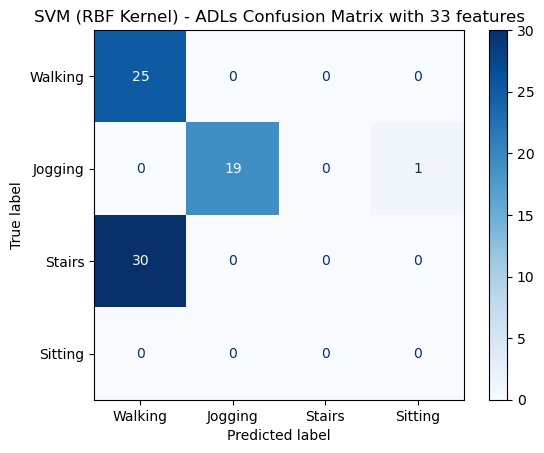

Logistic Regression Accuracy: 0.1333


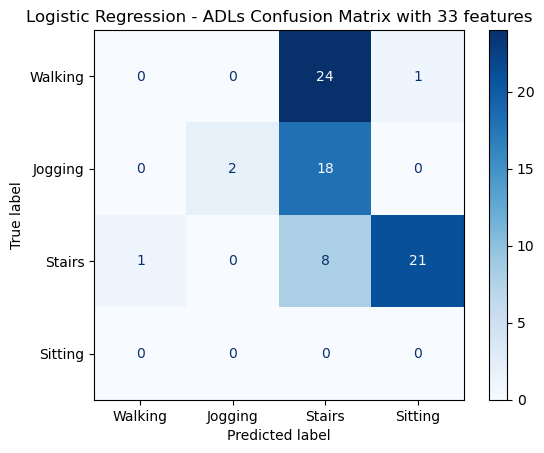

In [18]:
# combine ADLs and labels
X_e_adls = np.vstack([walk_features, jogging_features, stairs_features])
y_e_adls = np.array(walk_labels + jogging_labels + stairs_labels)

# Evaluate models on combined data
for name, model in models.items():
    predictions = model.predict(X_e_adls)
    acc = accuracy_score(y_e_adls, predictions)
    print(f"{name} Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_e_adls, predictions, labels=[0, 1, 2, 3])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_adls)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - ADLs Confusion Matrix with {X_e_adls.shape[1]} features")
    plt.show()

Binary Classification Results:
33 features extracted from each signal.

--------------------------------------------------


Random Forest Cross-Validation (Binary):
CV Accuracy: 0.9829 ± 0.0322
Random Forest Test Accuracy: 0.9993

Decision Tree Cross-Validation (Binary):
CV Accuracy: 0.9772 ± 0.0420
Decision Tree Test Accuracy: 0.9964

Extra Trees Cross-Validation (Binary):
CV Accuracy: 0.9889 ± 0.0211
Extra Trees Test Accuracy: 0.9993

LDA Cross-Validation (Binary):
CV Accuracy: 0.9929 ± 0.0113
LDA Test Accuracy: 0.9986

KNN (k=3) Cross-Validation (Binary):
CV Accuracy: 0.9503 ± 0.0232
KNN (k=3) Test Accuracy: 0.9870

SVM (RBF Kernel) Cross-Validation (Binary):
CV Accuracy: 0.9627 ± 0.0176
SVM (RBF Kernel) Test Accuracy: 0.9669

Logistic Regression Cross-Validation (Binary):
CV Accuracy: 0.9903 ± 0.0186
Logistic Regression Test Accuracy: 0.9978

--------------------------------------------------

Random Forest Accuracy (Binary): 0.9993


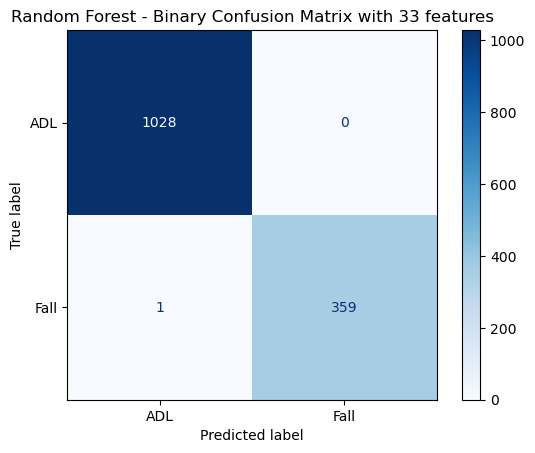

Decision Tree Accuracy (Binary): 0.9964


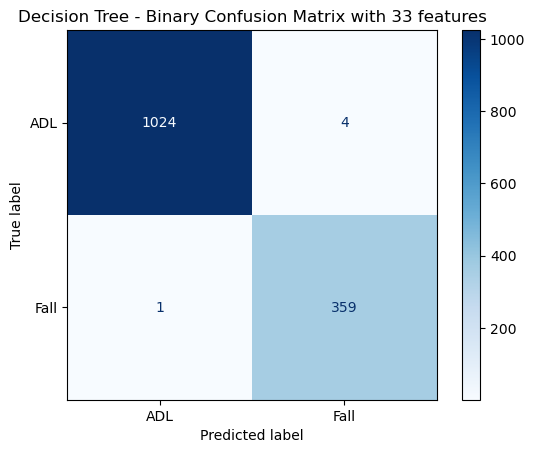

Extra Trees Accuracy (Binary): 0.9993


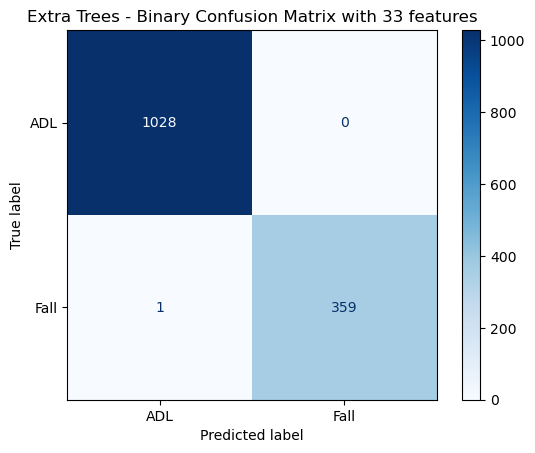

LDA Accuracy (Binary): 0.9986


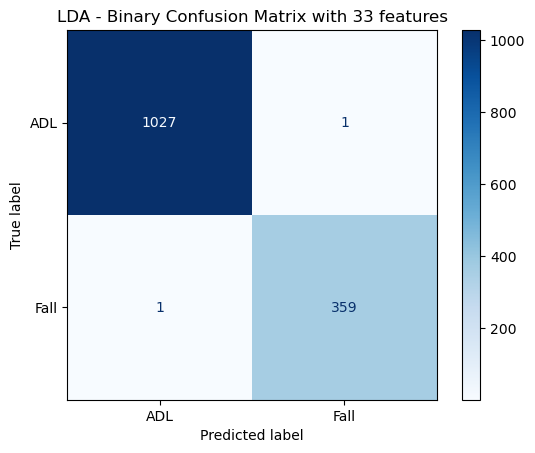

KNN (k=3) Accuracy (Binary): 0.9870


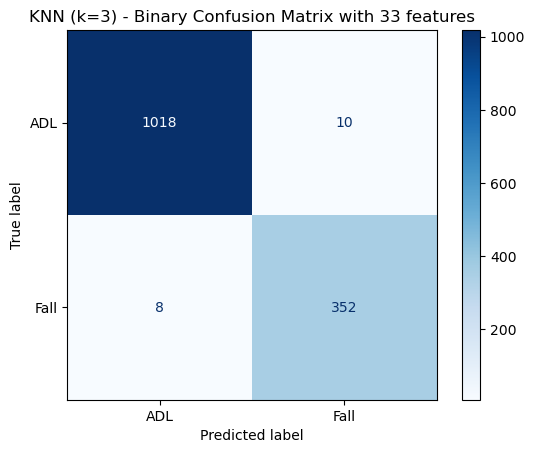

SVM (RBF Kernel) Accuracy (Binary): 0.9669


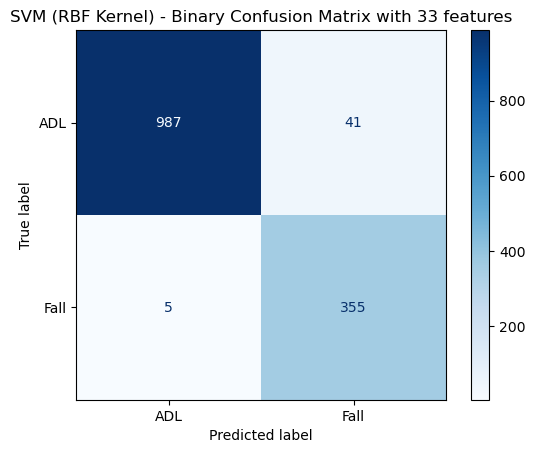

Logistic Regression Accuracy (Binary): 0.9978


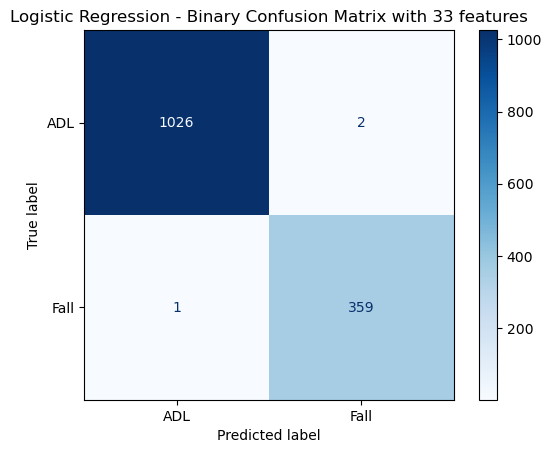

In [19]:
print("Binary Classification Results:")
print(f"{feature_matrix_binary.shape[1]} features extracted from each signal.")

print("\n" + "-"*50 + "\n")

for name, model in models.items():
    print(f"\n{name} Cross-Validation (Binary):")
    cv_scores = cross_val_score(model, feature_matrix_binary, label_vector_binary, cv=5)
    print(f"CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    model.fit(X_train_binary, y_train_binary)
    y_pred = model.predict(X_test_binary)
    acc = accuracy_score(y_test_binary, y_pred)
    print(f"{name} Test Accuracy: {acc:.4f}")

print("\n" + "-"*50 + "\n")

for name, model in models.items():
    y_pred = model.predict(X_test_binary)
    acc = accuracy_score(y_test_binary, y_pred)
    print(f"{name} Accuracy (Binary): {acc:.4f}")
    disp = ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred, display_labels=class_names_binary, cmap="Blues")
    plt.title(f"{name} - Binary Confusion Matrix with {X_test_binary.shape[1]} features")
    plt.show()



Random Forest Accuracy: 0.7468


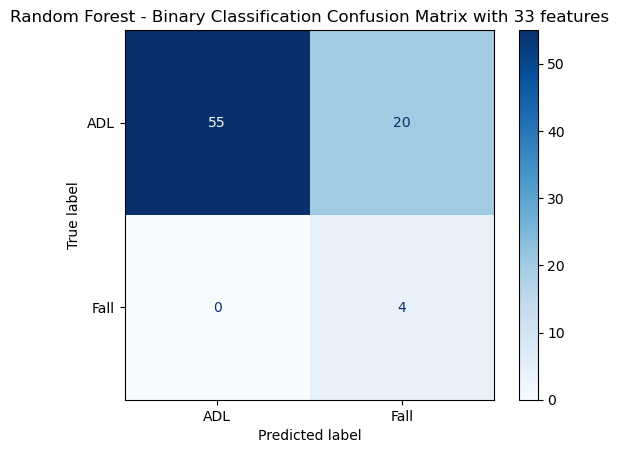

Decision Tree Accuracy: 0.6203


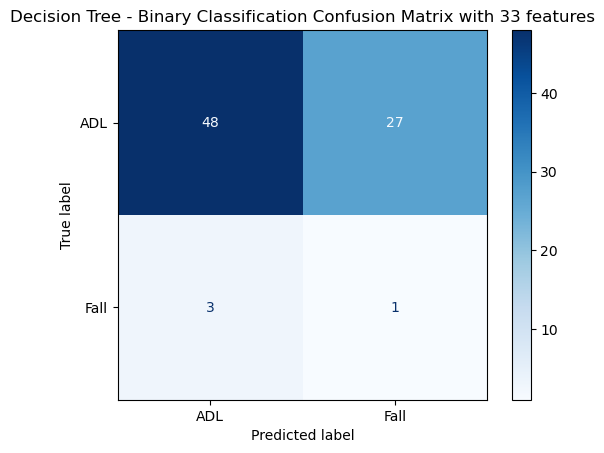

Extra Trees Accuracy: 0.7468


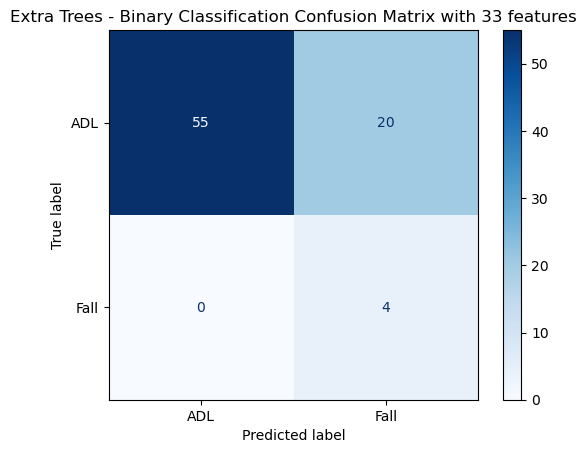

LDA Accuracy: 0.9620


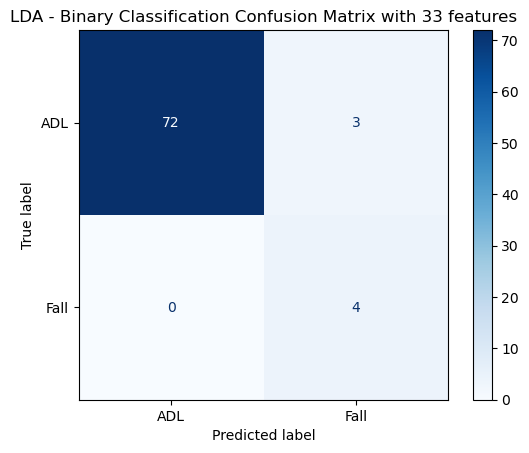

KNN (k=3) Accuracy: 0.7342


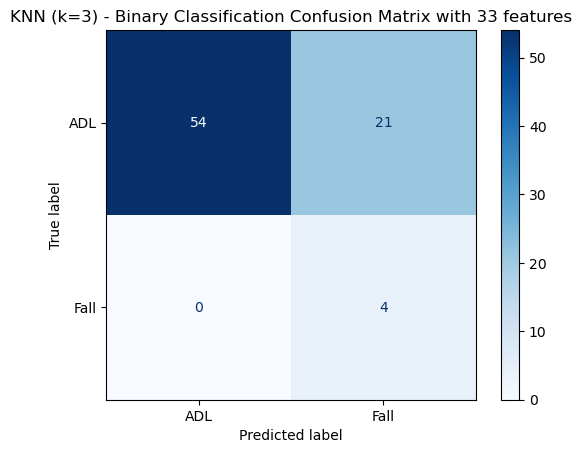

SVM (RBF Kernel) Accuracy: 0.6835


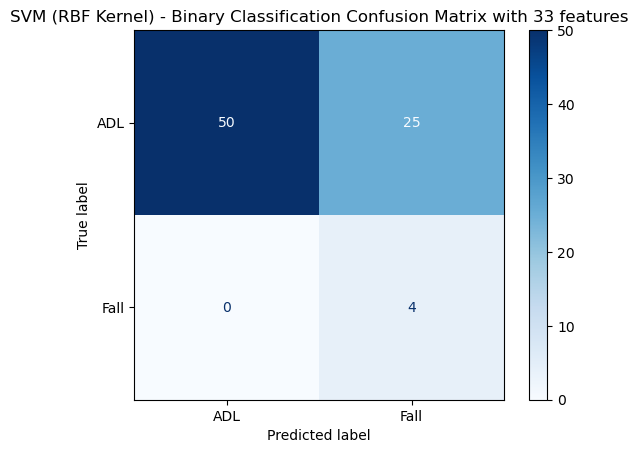

Logistic Regression Accuracy: 0.7595


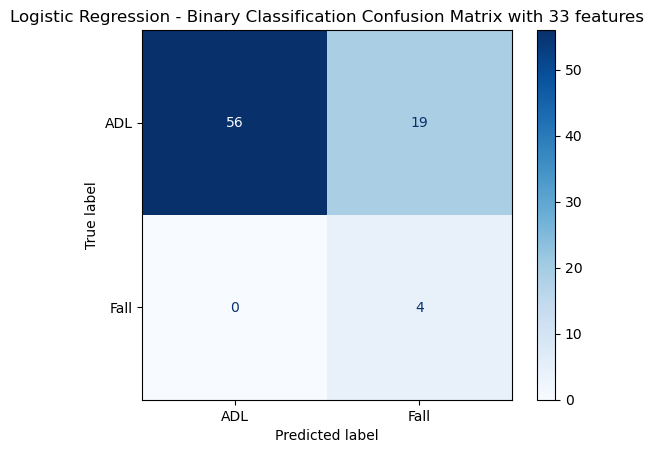

In [20]:
# Binary Classification with ADLs and Fall
X_e_binary = np.vstack([walk_features, jogging_features, stairs_features, fall_features])
y_e_binary = np.array([0] * len(walk_labels) + [0] * len(jogging_labels) + [0] * len(stairs_labels) + [1] * len(fall_labels))
# Evaluate models on binary data
for name, model in models.items():
    predictions = model.predict(X_e_binary)
    acc = accuracy_score(y_e_binary, predictions)
    print(f"{name} Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_e_binary, predictions, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_binary)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Binary Classification Confusion Matrix with {X_e_binary.shape[1]} features")
    plt.show()

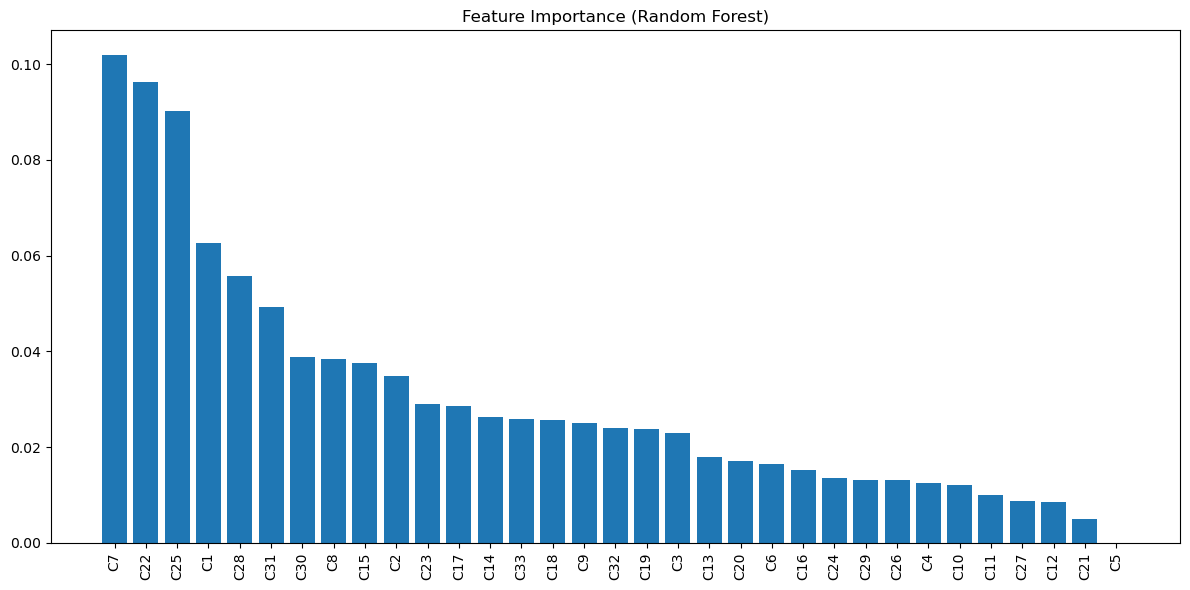

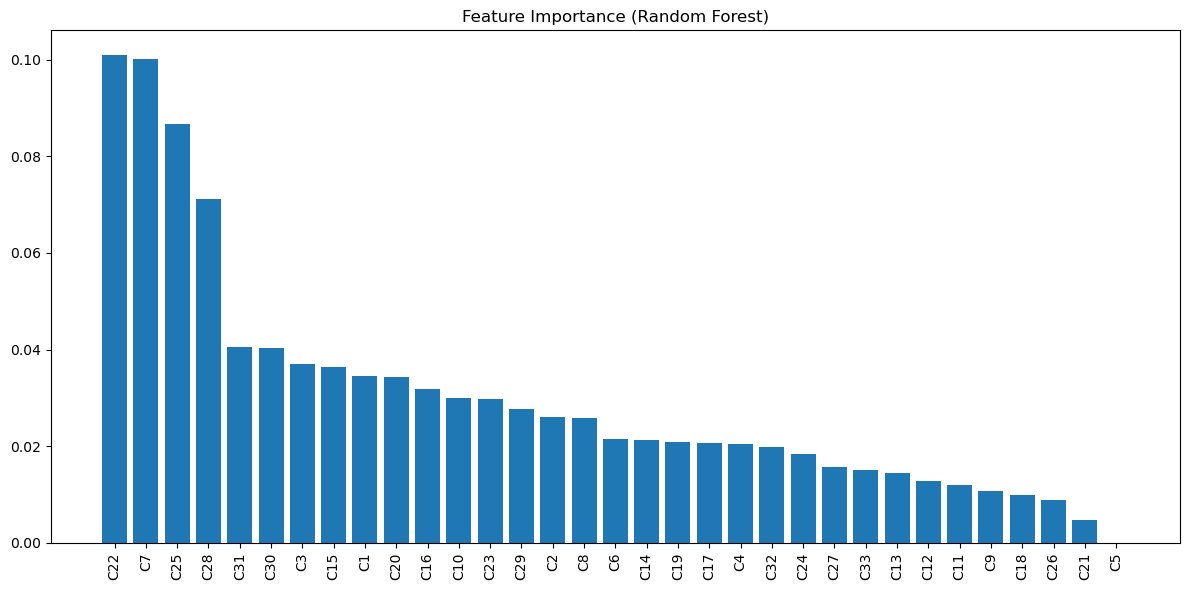

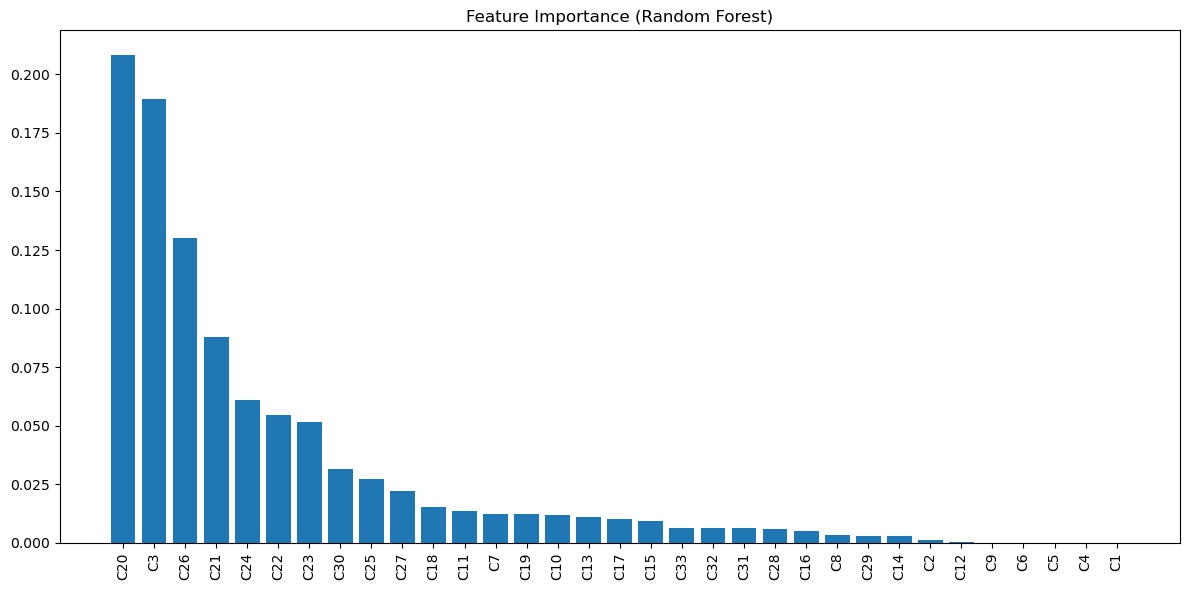

In [21]:
def evaluate_feature_importance(X_train, y_train, feature_names):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    # model = DecisionTreeClassifier(random_state=42)
    # model = KNeighborsClassifier(n_neighbors=3)
    # model = SVC(kernel='rbf', probability=True, random_state=42)
    # model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    # model = ExtraTreesClassifier(n_estimators=100, random_state=42)
    # model = LinearDiscriminantAnalysis()
    # model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    # model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Feature Importance (Random Forest)")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.tight_layout()
    plt.show()

    return importances, indices

feature_names = [f'C{i}' for i in range(1, 34)]

# importances_combined, sorted_indices_combined = evaluate_feature_importance(X_train_combined, y_train_combined, feature_names)
# importances_adls, sorted_indices_adls = evaluate_feature_importance(X_train_adls, y_train_adls, feature_names)
# importances_binary, sorted_indices_binary = evaluate_feature_importance(X_train_binary, y_train_binary, feature_names)
importances_combined, sorted_indices_combined = evaluate_feature_importance(X_e_combined, y_e_combined, feature_names)
importances_adls, sorted_indices_adls = evaluate_feature_importance(X_e_adls, y_e_adls, feature_names)
importances_binary, sorted_indices_binary = evaluate_feature_importance(X_e_binary, y_e_binary, feature_names)


In [22]:
# walk_files = ['walking_1.csv', 'walking_4.csv', 'walking_5.csv', 'walking_6.csv', 'walking_7.csv']
# # walk_files = ['walking_1.csv', 'walking_2.csv', 'walking_3.csv', 'walking_4.csv', 'walking_5.csv', 'walking_6.csv', 'walking_7.csv']
# walk_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in walk_files]

# # jogging_files = ['jogging_1.csv', 'jogging_2.csv', 'jogging_3.csv']
# jogging_files = ['jogging_3.csv']
# jogging_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in jogging_files]

# # stairs_files = ['stairs_1.csv', 'stairs_2.csv', 'stairs_3.csv', 'stairs_4.csv', 'stairs_5.csv', 'stairs_6.csv', 'stairs_7.csv', 'stairs_8.csv']
# stairs_files = ['stairs_1.csv', 'stairs_2.csv', 'stairs_3.csv', 'stairs_4.csv', 'stairs_6.csv', 'stairs_7.csv', 'stairs_8.csv']
# stairs_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in stairs_files]



# Load walking data
earpiece_walk_data = pd.read_csv('earpiece/walking_7.csv')
e_data_walk = earpiece_walk_data[['X', 'Y', 'Z']].T.values

# Load jogging and stairs data
earpiece_jogging_data = pd.read_csv('earpiece/jogging_3.csv')
e_data_jogging = earpiece_jogging_data[['X', 'Y', 'Z']].T.values

# Load stairs data
earpiece_stairs_data = pd.read_csv('earpiece/stairs_7.csv')
e_data_stairs = earpiece_stairs_data[['X', 'Y', 'Z']].T.values

# Load fall data
fall_files = ['earpiece/fall_1.csv', 'earpiece/fall_2.csv', 'earpiece/fall_3.csv', 'earpiece/fall_4.csv']
fall_data_list = [pd.read_csv(f)[['X', 'Y', 'Z']].T.values for f in fall_files]

fall_data_list = fn.keep_from_peak(fall_data_list, 400)

# Segment data into chunks of 800 samples
list_of_walk_segments = [
    e_data_walk[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_walk.shape[1] // 800)
]

list_of_jogging_segments = [
    e_data_jogging[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_jogging.shape[1] // 800)
]

list_of_stairs_segments = [
    e_data_stairs[:, i*800:(i+1)*800].reshape(-1)
    for i in range(e_data_stairs.shape[1] // 800)
]

walk_data_array = np.stack(list_of_walk_segments)
walk_features = np.array([extract_features(seg.reshape(3, 800)) for seg in walk_data_array])
walk_labels = [0] * len(walk_features)  # 0 = walking

jogging_data_array = np.stack(list_of_jogging_segments)
jogging_features = np.array([extract_features(seg.reshape(3, 800)) for seg in jogging_data_array])
jogging_labels = [1] * len(jogging_features)  # 1 = jogging

stairs_data_array = np.stack(list_of_stairs_segments)
stairs_features = np.array([extract_features(seg.reshape(3, 800)) for seg in stairs_data_array])
stairs_labels = [2] * len(stairs_features)  # 2 = stairs

fall_features = np.array([extract_features(seg) for seg in fall_data_list])
fall_labels = [4] * len(fall_features)  # 4 = fall


4 files processed 
Min length: 800 
Max length: 800


In [23]:
# print probabilities for each class and true label
for name, model in models.items():
    probabilities = model.predict_proba(X_combined)
    print(f"{name} Class Probabilities:")
    for i, prob in enumerate(probabilities):
        prob_rounded = [f"{p:.2f}" for p in prob]
        print(f"Sample {i}: {prob_rounded}, True Label: {y_combined[i]}")
    print("\n")

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [ ]:
# saving models
import joblib
# Save each model to a file
for name, model in models.items():
    
    # Save the trained model
    filename = f"{name.replace(' ', '_')}.joblib"
    joblib.dump(model, filename)




In [ ]:
walk_files = ['walking_7.csv']
# walk_files = ['walking_1.csv', 'walking_2.csv', 'walking_3.csv', 'walking_4.csv', 'walking_5.csv', 'walking_6.csv', 'walking_7.csv']
walk_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in walk_files]

# jogging_files = ['jogging_1.csv', 'jogging_2.csv', 'jogging_3.csv']
jogging_files = ['jogging_3.csv']
jogging_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in jogging_files]

stairs_files = ['stairs_1.csv', 'stairs_2.csv', 'stairs_3.csv', 'stairs_4.csv', 'stairs_5.csv', 'stairs_6.csv', 'stairs_7.csv', 'stairs_8.csv']
# stairs_files = ['stairs_7.csv']
stairs_data_list = [pd.read_csv(f'earpiece/{f}')[['X', 'Y', 'Z']].T.values for f in stairs_files]


In [ ]:
# plot all the data
for i, data in enumerate(walk_data_list):
    plt.figure(figsize=(10, 6))
    plt.plot(data[0], label='X')
    plt.plot(data[1], label='Y')
    plt.plot(data[2], label='Z')
    plt.title(f' Data {i+1}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# plot all the data
for i, data in enumerate(stairs_data_list):
    plt.figure(figsize=(10, 6))
    plt.plot(data[0], label='X')
    plt.plot(data[1], label='Y')
    plt.plot(data[2], label='Z')
    plt.title(f' Data {i+1}')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid()
    plt.show()